# Regresión lineal simple

**Regresión lineal simple**

Algoritmo de aprendizaje supervisado que nos indica la tendencia de un conjunto de datos continuos, modelando la relación entre una variable dependiente $Y$ y una explicativa llamada $X$.

La fórmula que representa la tendencia lineal es:
$$ y = mx_i + b$$

**Regresión lineal múltiple**

Cuando nosotros tenemos diferentes variables cuantitativas se requiere de otro algoritmo llamado regresión lineal múltiple. Es decir, si nuestro problema tiene más de dos variables se le considera lineal múltiple.

En otras palabras, nos permite encontrar la relación de $X-Y$ pero considerando más datos.

_____________________________

## Regresión lineal simple

Empecemos con un ejemplo de **regresión lineal simple** con Scikit-Learn. Para eso, vamos a usar un dataset de salarios con relación a los años de experiencia.

### Librerías

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import fundamentos_ML.utils.paths as path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Leyendo los datos

In [3]:
input_data = path.data_raw_dir('salarios.csv')
dataset = pd.read_csv(input_data)
dataset.head(5)

,Aexperiencia,Salario
0,10.0,42500
1,8.0,36302
2,5.4,35000
3,2.5,18103
4,1.0,15000


In [4]:
dataset.shape

(30, 2)

### División de datos

Nuestro dataset se va a dividir en dos conjuntos: de entretamiento y de prueba. Es preferible que el 80 % del dataset sea destinado al entrenamiento, y el restante 20 % al set de pruebas.

In [5]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [7]:
X_train

array([[10. ],
       [ 7. ],
       [ 2. ],
       [ 5.3],
       [ 8. ],
       [ 3. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 5. ],
       [ 8. ],
       [ 1. ],
       [ 4. ],
       [ 1. ],
       [ 3. ],
       [ 2. ],
       [10. ],
       [ 6. ],
       [10. ],
       [ 2.5],
       [10. ],
       [ 3.4],
       [ 5. ],
       [ 3. ]])

### Creación del modelo lineal simple

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regressor.predict(X_train)

### Visualización de los resultados

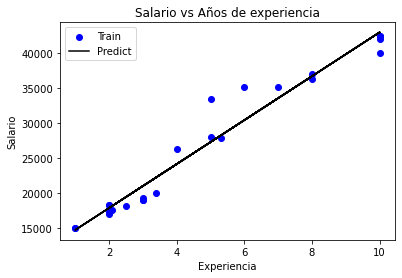

In [10]:
import fundamentos_ML.visualization.visualize as visualize
visualize.linear_reg_simple_plot(X_train, y_train, X_train, y_pred, 'blue', 'Train')

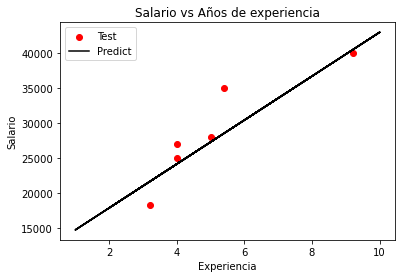

In [11]:
visualize.linear_reg_simple_plot(X_test, y_test, X_train, y_pred, 'red', 'Test')

### Evaluando el modelo

In [12]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, regressor.predict(X_test))
r2 = metrics.r2_score(y_test, regressor.predict(X_test))

print(f"""Coefficients: {regressor.coef_}
Independent term: {regressor.intercept_}
r2: {r2.round(4)}
mse: {mse.round(4)}
""")

Coefficients: [3144.78019038]
Independent term: 11554.993502037114
r2: 0.7862
mse: 10417352.0775



Como vemos, nuestro coeficiente de determinación (R^2) es no muy cercano a 1, por lo que tenemos un ajuste no muy bueno. Para mejorarlo, es necesario conseguir más datos o realizar una regresión lineal múltiple donde se empleen otros descriptores que puedan ayudar al ajuste.

___________________________________________________________________

## Regresión lineal múltiple

### Preparando el dataset

Se va a tratar el mismo ejemplo anterior, pero ahora se le agregará una tercera columna del país al dataset.

In [13]:
# List of countries
countries_list = ['MX', 'BR', 'CO', 'VN', 'CH', 'AR']
countries = [np.random.choice(countries_list) for i in range(dataset.shape[0])]

dataset['Country'] = countries
dataset

,Aexperiencia,Salario,Country
0,10.0,42500,BR
1,8.0,36302,VN
2,5.4,35000,VN
3,2.5,18103,CH
4,1.0,15000,BR
5,8.0,37000,VN
6,4.0,26300,BR
7,6.0,35201,AR
8,2.0,18302,AR
9,10.0,42000,BR


Ahora, debido a que el descriptor es una variable categórica, es necesario realizar una conversión que me lo convierta a un valor numérico y poder modelar con una regresión lineal múltiple.

In [14]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(categories=[countries_list])

encoder.fit(dataset[["Country"]])
dataset["Country-encoded"] = encoder.transform(dataset[["Country"]])
dataset

,Aexperiencia,Salario,Country,Country-encoded
0,10.0,42500,BR,1.0
1,8.0,36302,VN,3.0
2,5.4,35000,VN,3.0
3,2.5,18103,CH,4.0
4,1.0,15000,BR,1.0
5,8.0,37000,VN,3.0
6,4.0,26300,BR,1.0
7,6.0,35201,AR,5.0
8,2.0,18302,AR,5.0
9,10.0,42000,BR,1.0


### Diviendo de datos

A partir de este momento, los pasos son similares a modelo de regresión lineal simple, pero ahora agregamos la columna (feature) que deseamos agregar al análisis.

In [15]:
x = dataset[['Aexperiencia', 'Country-encoded']].values
y = dataset[['Salario']].values

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

### Creando el modelo

In [16]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_train)
y_pred

array([[43083.07885474],
       [33947.65054563],
       [17300.42430293],
       [28407.00066422],
       [36765.35133226],
       [21141.61401337],
       [18153.33173944],
       [17471.00579023],
       [18469.21811556],
       [26947.59707394],
       [36765.35133226],
       [14653.30500359],
       [23788.7333127 ],
       [14312.14202899],
       [20971.03252607],
       [18153.33173944],
       [42741.91588013],
       [30788.78678439],
       [42912.49736744],
       [19562.18213275],
       [42741.91588013],
       [22234.57803057],
       [27459.34153585],
       [21141.61401337]])

### Visualizando la predicción del modelo

In [19]:
from mpl_toolkits.mplot3d import Axes3D

/tmp/ipykernel_1376/3383377691.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(countries_list, fontsize=12)


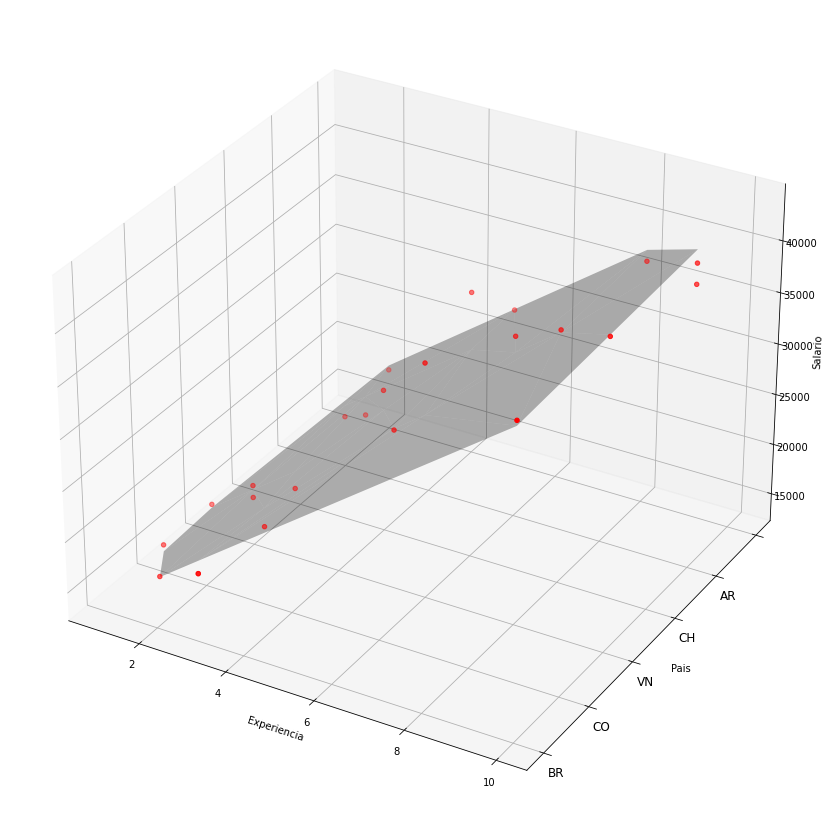

In [75]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

ax.plot_trisurf(X_train[:, 0], X_train[:, 1], y_pred.reshape(24,), color='black', alpha=0.3)
ax.scatter3D(X_train[:, 0], X_train[:, 1], y_train, c='red')
ax.set_xlabel('Experiencia')
ax.set_ylabel('Pais')
ax.set_zlabel('Salario')
ax.set_yticklabels(countries_list, fontsize=12)
plt.show()

In [18]:
mse = metrics.mean_squared_error(y_test, regressor.predict(X_test))
r2 = metrics.r2_score(y_test, regressor.predict(X_test))

print(f"""r2: {r2.round(4)}
mse: {mse.round(4)}""")

r2: 0.789
mse: 10282150.8113


Como vemos, con unos datos random de prueba se obtuvo un coeficiente de determinación ligeramente mayor. Esto no siempre puede ser así. Se realizó esto como ejercicio para demostrar únicamente el modelo de regresión lineal múltiple.